<center>
<h2>Capstone Project</h2>

# <span style='color: #81A5FF; '> 😋 Exploratory Client Data Analysis and Normalization </span>

<h3> Group 4 </h3>

<span style='color: #81A5FF; font-size: 18px;'>2023/2024</span>
</center>



---------

## Table of Contents

The present notebook refers to the section of exploring the simulated client-centred data and prepare according to certain assumptions to be further used within the Flavour Flix platform. Essentially, the key procedures followed throughout this section are:

<span style = 'font-size: 18px;'>

[🍽 Importing Libraries and Data](#1.-importing-libraries-and-data)  ;  <br>
[🍽 Summary Statistics](#2-summary-statistics);<br>
[🍽 Visualization and Consistency Checking](#3-visualization-and-consistency-checking)  ; <br>
[🍽 Exporting the Data](#4-exporting-data);<br>

</span>


-------

## 1. Importing Libraries and Data

[Back to TOC](#table-of-contents)

In [49]:
# importing the necessary libraries and modules
import numpy as np
import pandas as pd
from datetime import datetime
import random

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from functions.utils import *
from functions.location import *
from functions.menus import *
from functions.preprocessement import *

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# importing the data
client_data = pd.read_csv('data/clientData.csv', sep=',', index_col='id')

## 2. Summary Statistics

[Back to TOC](#table-of-contents)

In [7]:
client_data.describe()

,price_range
count,900.000000
mean,17.854444
std,4.595535
min,10.000000
25%,14.000000
50%,18.000000
75%,22.000000
max,25.000000


In [8]:
client_data.describe(include='object')

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,smoker,drinks_alcohol,dietary_restrictions,allergies,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,cuisine_type,lunch_hour,dinner_hour
count,1000,1000,1000,923,1000,1000,938,943,946,938,1000,1000,982,979,1000,968,1000,891,1000,1000
unique,224,994,1000,2,1000,964,14,19,2,2,3,11,56,29,5,9,25,21,4,4
top,Miléna,Bertholin,csinyardrr@disqus.com,Male,fsinyardrr,28/01/1960,Portuguese,Lisbon,False,True,none,none,lasanha,lasanha,mindful,Credit Card,after work,portuguese,13:00 - 14:00,20:00 - 21:00
freq,11,2,1,467,1,3,836,88,498,482,634,899,40,63,217,439,431,330,505,505


In [9]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   first_name            1000 non-null   object 
 1   last_name             1000 non-null   object 
 2   email                 1000 non-null   object 
 3   gender                923 non-null    object 
 4   username              1000 non-null   object 
 5   date_of_birth         1000 non-null   object 
 6   nationality           938 non-null    object 
 7   city                  943 non-null    object 
 8   travel_car            1000 non-null   bool   
 9   smoker                946 non-null    object 
 10  drinks_alcohol        938 non-null    object 
 11  dietary_restrictions  1000 non-null   object 
 12  allergies             1000 non-null   object 
 13  favourite_food        982 non-null    object 
 14  dislike_food          979 non-null    object 
 15  personality           1000

## 3. Visualization and Consistency-checking

[Back to TOC](#table-of-contents)

#### Preferred Average Price per Person

In [6]:
# finding rows in 'client_data' where 'price_range' is null.
client_data[client_data['price_range'].isnull()]

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,travel_car,smoker,...,allergies,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,price_range,cuisine_type,lunch_hour,dinner_hour
id,,,,,,,,,,,,,,,,,,,,,
4,Gaëlle,O'Hickey,gohickey3@biblegateway.com,Male,kohickey3,21/10/1974,Portuguese,Coimbra,False,True,...,none,filetes de pescada,ceviche,foodie,MBWay,after work,NaN,portuguese,13:00 - 14:00,20:00 - 21:00
8,Nuó,Jordison,bjordison7@soup.io,Male,ljordison7,27/07/2001,Mozambican,Coimbra,True,False,...,none,pasteis de bacalhau,pão de queijo,adventurous,Cash,after work,NaN,portuguese,13:00 - 14:00,20:00 - 21:00
13,Stéphanie,Sargent,jsargentc@nymag.com,Female,csargentc,01/01/1987,Italian,Santarém,False,False,...,none,pizza,ceviche,mindful,NaN,after work,NaN,portuguese,13:00 - 14:00,18 :00 - 19:00
48,Lorène,Edwin,eedwin1b@mtv.com,Male,ledwin1b,04/07/1994,Portuguese,Coimbra,True,False,...,castanhas,panados,bacalhau,adventurous,MBWay,after work,NaN,italian,13:00 - 14:00,20:00 - 21:00
59,Kuí,Dybald,mdybald1m@redcross.org,Female,fdybald1m,22/05/2001,Portuguese,Setúbal,False,False,...,none,panados,sopa de tomate,adventurous,MBWay,bistro,NaN,portuguese,11:00 - 12:00,20:00 - 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,André,Habbal,lhabbalq9@aol.com,Female,khabbalq9,20/07/1988,Portuguese,Guimarães,True,False,...,none,dim sum,filetes de pescada,foodie,Cash,contemporary,NaN,indian,12 :00 - 13:00,20:00 - 21:00
966,Hélèna,Venus,bvenusqt@histats.com,Male,cvenusqt,28/05/1973,Portuguese,Porto,False,True,...,none,frango com piri-piri,ceviche,foodie,Credit Card,central,NaN,international,12 :00 - 13:00,20:00 - 21:00
967,Nadège,Lockley,vlockleyqu@freewebs.com,Male,ulockleyqu,06/11/1970,Portuguese,NaN,False,False,...,none,bacalhau a bras,churrasco,comfort,MBWay,author,NaN,mediterranean,13:00 - 14:00,20:00 - 21:00


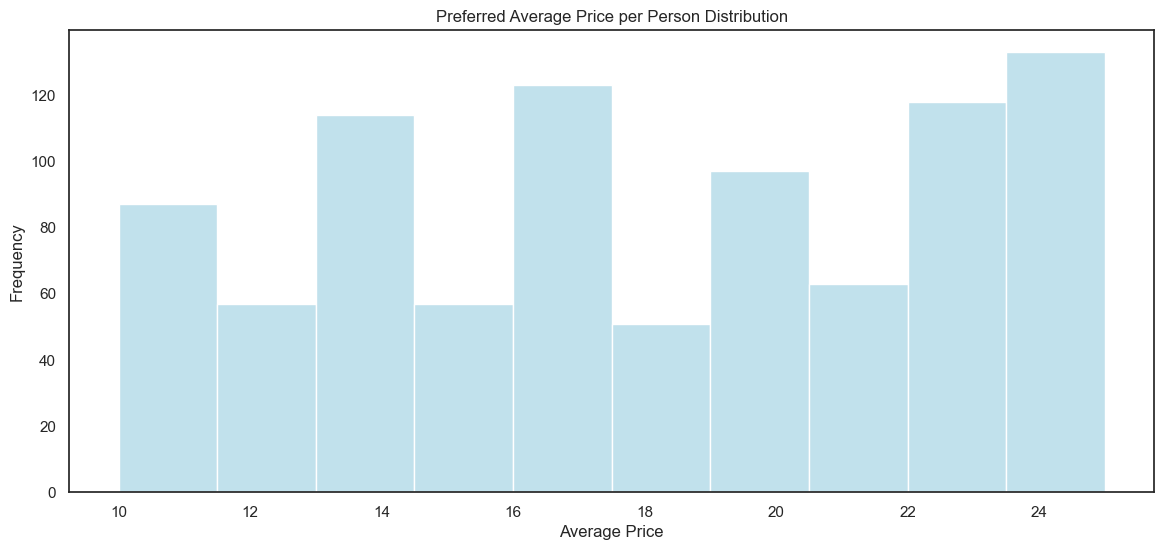

In [16]:
# Create the histogram using Seaborn without the grid
sns.set(style="white") 
plt.figure(figsize=(14, 6))
sns.histplot(client_data['price_range'], bins=10, color='lightblue')

# labelling the axis
plt.xlabel('Average Price')
plt.ylabel('Frequency')

plt.title('Preferred Average Price per Person Distribution')

# Display the histogram
plt.show()

In [17]:
# Normalizing the distributed prices such that they are more realistic
def normally_distributed_prices(price):
    if random.random() < 0.5:
        price = random.randint(12, 21)
    else:
        if random.random() > 0.9:
            price = random.randint(21, 40)
    return price

In [50]:
# Normalizing the distributed prices
client_data['normal_price_range'] = client_data['price_range'].apply(normally_distributed_prices)

KeyError: 'price_range'

In [19]:
# Replacing missing values 
client_data['normal_price_range'].fillna(random.randint(12, 31), inplace=True)

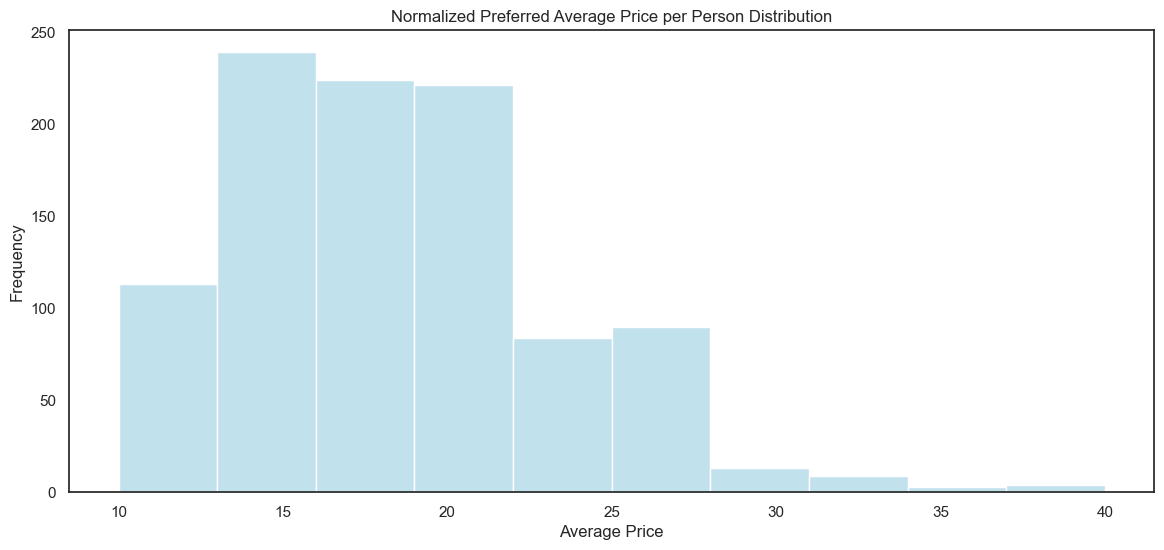

In [20]:
# Create the histogram using Seaborn for the normalized data
sns.set(style="white")  
plt.figure(figsize=(14, 6))
sns.histplot(client_data['normal_price_range'], bins=10, color='lightblue')

# labelling the axis
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Normalized Preferred Average Price per Person Distribution')

# Display the histogram
plt.show()

#### Date of Birth and Age

In [21]:
# Converting 'DOB' column to datetime
client_data['date_of_birth'] = pd.to_datetime(client_data['date_of_birth'], format='%d/%m/%Y')

# Calculating the age
current_date = datetime.datetime.now()
client_data['age'] = (current_date - client_data['date_of_birth']) // pd.Timedelta(days=365.25)  # Accounting for leap years

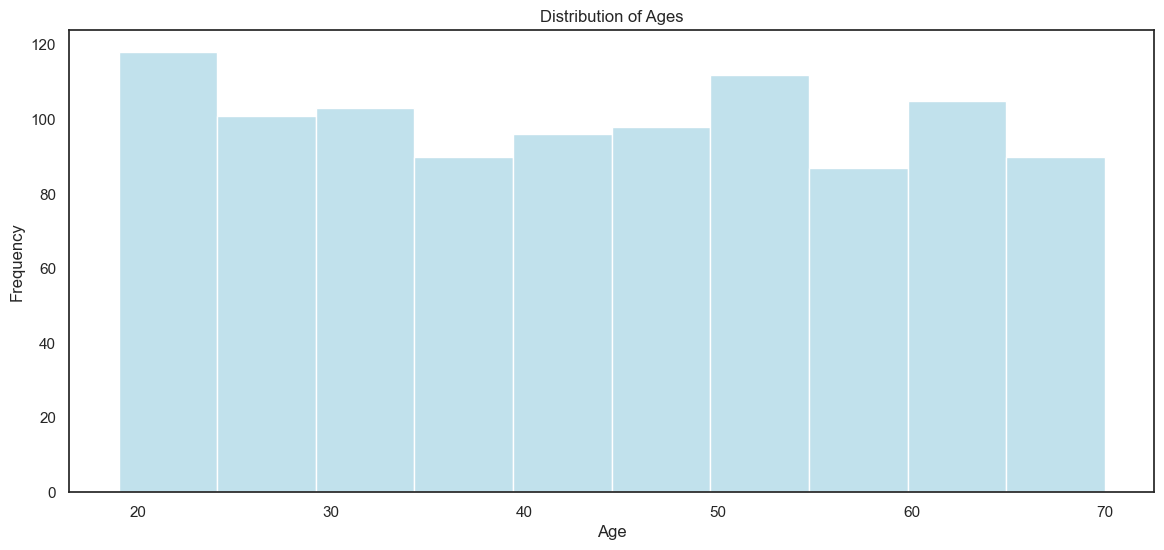

In [22]:
# Create the histogram for the age distribution
sns.set(style="white")  # Keeping the style without grid
plt.figure(figsize=(14, 6))
sns.histplot(client_data['age'], bins=10, color='lightblue')

# Labelling the axis
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

# Display the histogram
plt.show()

#### Gender

In [23]:
# Replacing missing values with 'Other'
client_data['gender'].fillna('Other', inplace=True)

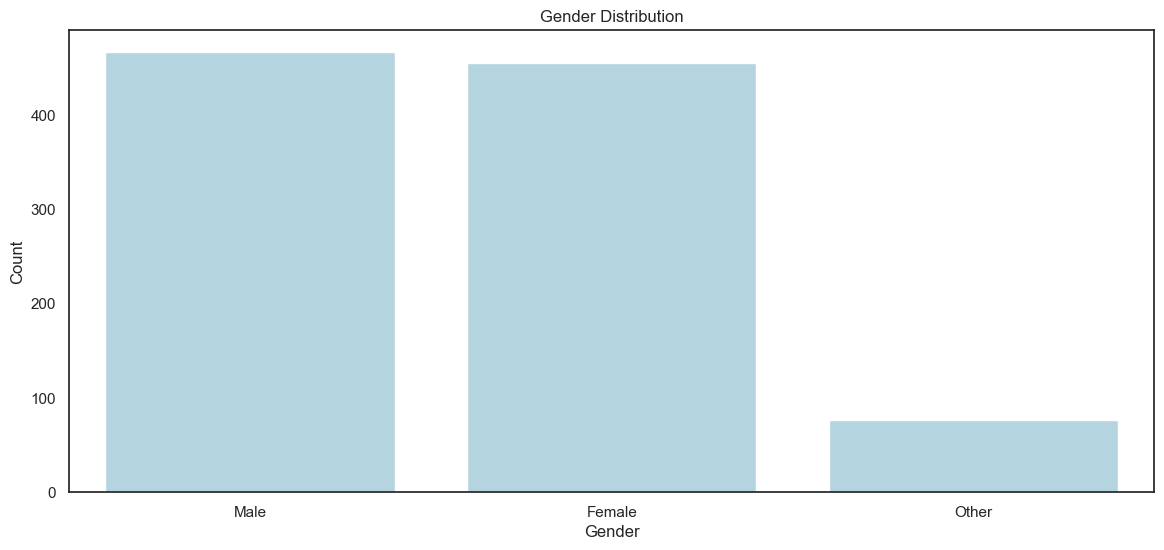

In [24]:
# Create the count plot for gender distribution
sns.set(style="white")  # Style without grid
plt.figure(figsize=(14, 6))
sns.countplot(data=client_data, x='gender', palette=['lightblue'])
plt.title('Gender Distribution')

# Labelling the axis
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

In [25]:
# Normalizing the gender such that it is more realistic
def n_gender(observation):
    if (observation['gender'] == 'Other') and (observation['age'] <= 50):
        return random.choice(['Male', 'Female'])
    else:
        return observation['gender']

In [26]:
# Normalizing the gender
client_data['gender'] = client_data.apply(lambda x: n_gender(x), axis=1)

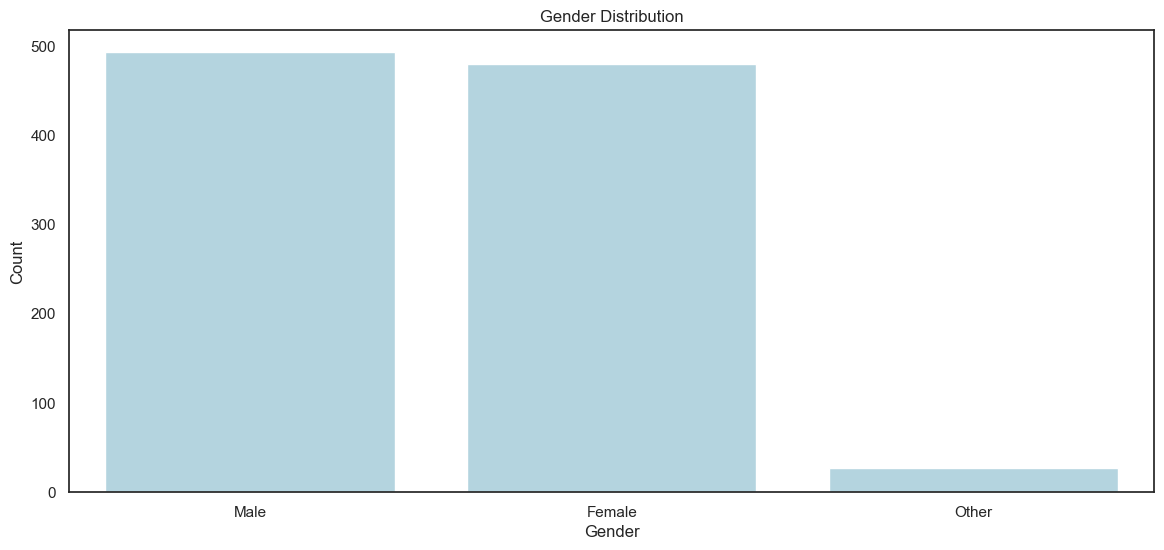

In [27]:
# Create the count plot for gender distribution after normalization
plt.figure(figsize=(14, 6))
sns.countplot(data=client_data, x='gender', color='lightblue')  # Setting all bars to light blue
plt.title('Gender Distribution')

# Labelling the axis
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Smokers and Alcohol

In [28]:
# Replacing the null values with 'False
client_data['smoker'].fillna(False, inplace=True)

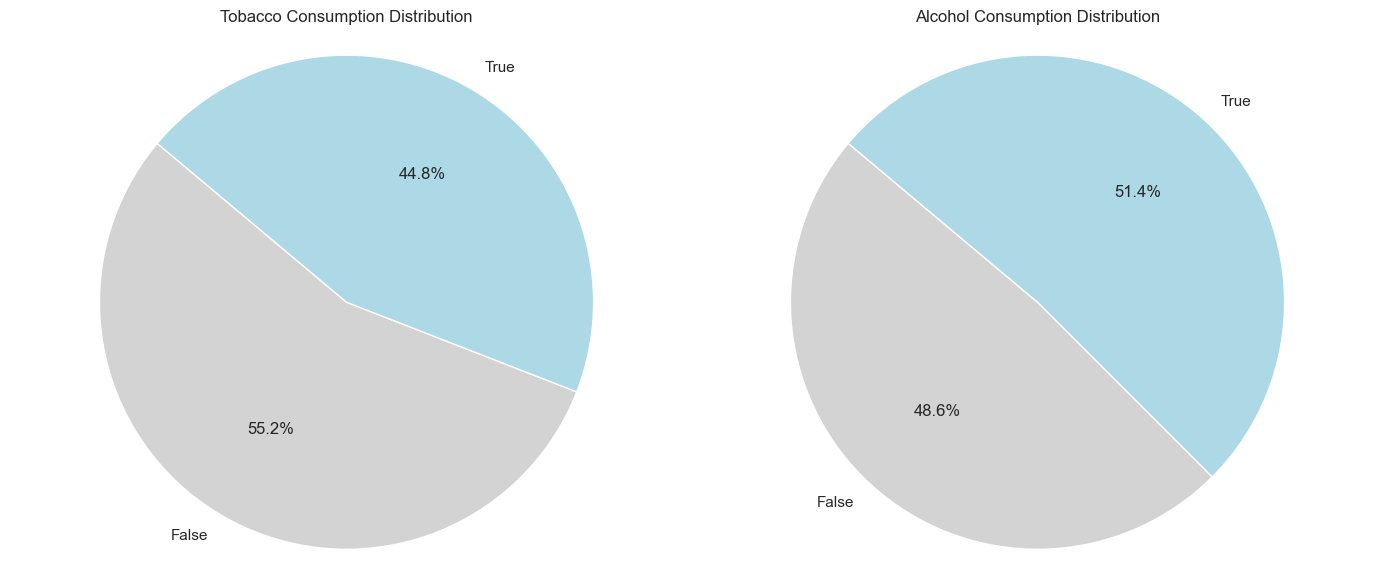

In [34]:
# Count the values in the "gender" variable
smoker_counts = client_data['smoker'].value_counts()
alcohol_counts = client_data['drinks_alcohol'].value_counts(ascending=True)
colors = ['lightgray', 'lightblue']
# Creating subplots for the distributions
plt.figure(figsize=(14, 6))

# First subplot for smoker distribution
plt.subplot(1, 2, 1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Tobacco Consumption Distribution")

# Second subplot for alcohol distribution
plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Alcohol Consumption Distribution")

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

The data from the Portuguese National Health Survey from 2019 finds that only 17% of the portuguese population is a smoker - thus, we will try to reshape our distribution to match these statistics more accordingly. Also in the afore mentioned report, it is stated that approximately 70% of Portugal's residents have consumed at least one alcoholic beverage within a year time span. For this reason, it seems that the current distribution of people who drink alcohol seems sensible. The missing values of the latter were inputed with "True".

In [35]:
# Normalizing the data such that it is more realistic
def adjust_smoking(observation, percentage):
    if observation == True and random.random() < percentage:
        return False
    else:
        return observation

In [36]:
# Normalizing the data
client_data['smoker_n'] = client_data['smoker'].apply(lambda x: adjust_smoking(x, 0.65))

In [37]:
# Replacing the missing values with 'True'
client_data['drinks_alcohol'].fillna(True, inplace=True)

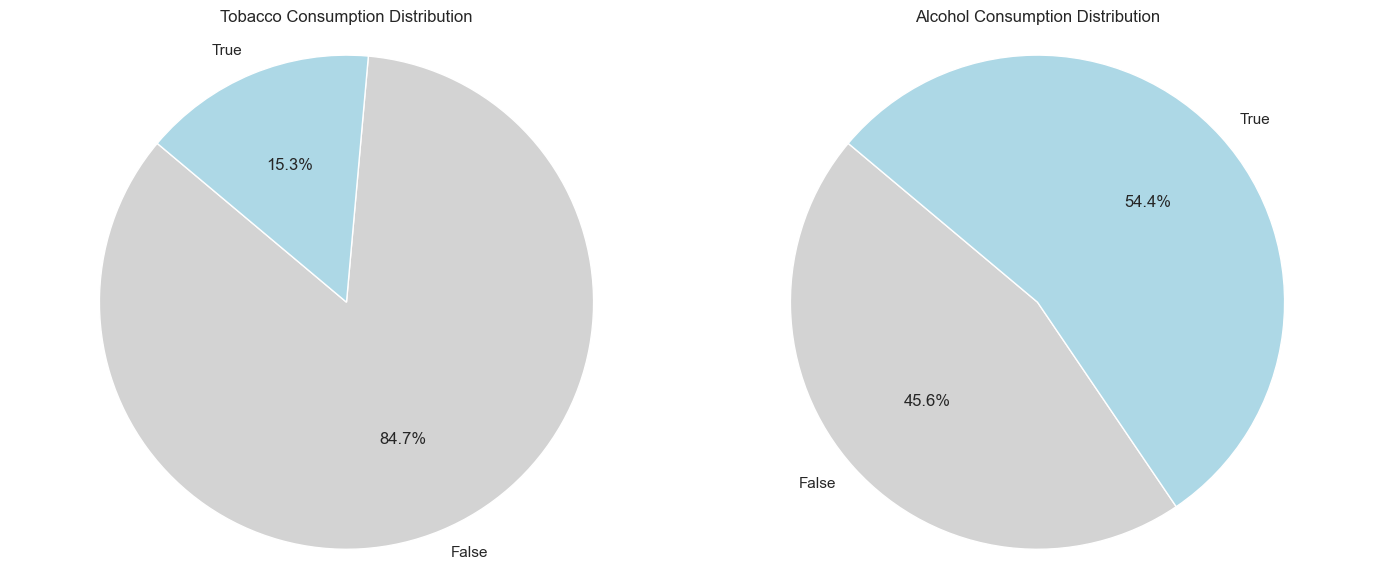

In [38]:
# Count the values in the "gender" variable
smoker_counts = client_data['smoker_n'].value_counts()
alcohol_counts = client_data['drinks_alcohol'].value_counts(ascending=True)

# Creating subplots for the distributions
plt.figure(figsize=(14, 6))

# First subplot for smoker distribution
plt.subplot(1, 2, 1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Tobacco Consumption Distribution")

# Second subplot for alcohol distribution
plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Alcohol Consumption Distribution")

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

#### Other remaining missing values

In [39]:
# Replacing the remaining missing values 
def fill_randomly(observation, options):
    if pd.isna(observation):  # Check for NaN (missing) values
        return random.choice(options)
    else:
        return observation

In [40]:
# Replacing the missing values for the column 'city'
unique_cities_without_nan = [city for city in list(client_data['city'].unique()) if not pd.isna(city)]
client_data['city'] = client_data['city'].apply(lambda x: fill_randomly(x, unique_cities_without_nan))

In [41]:
# Replacing the missing values for the column 'nationality'
client_data['nationality'] = client_data['nationality'].apply(lambda x: fill_randomly(x, ['Portuguese', 'Brazillian', 'American', 'British']))

In [42]:
# Replacing the missing values for the column 'preferred_payment'
client_data['preferred_payment'] = client_data['preferred_payment'].apply(lambda x: fill_randomly(x, ['MBWay', 'Cash', 'Credit Card', 'Visa', 'Paypal']))

In [43]:
# Dropping the columns 'age', 'smoker', and 'price_range'
client_data.drop(columns=['age', 'smoker', 'price_range'], axis=1, inplace=True)

#### Adding our own entries

In [44]:
client_data

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,travel_car,drinks_alcohol,...,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,cuisine_type,lunch_hour,dinner_hour,normal_price_range,smoker_n
id,,,,,,,,,,,,,,,,,,,,,
1,Örjan,Douberday,wdouberday0@google.com.br,Male,mdouberday0,1961-12-17,Portuguese,Setúbal,False,False,...,arroz de pato,sopa de tomate,mindful,MBWay,familiar,seafood,13:00 - 14:00,19:00 - 20:00,15.0,False
2,Céline,Milmo,lmilmo1@naver.com,Male,lmilmo1,1986-11-02,Portuguese,Setúbal,True,False,...,cheesecake,bitoque,mindful,Cash,after work,portuguese,13:00 - 14:00,21:00 - 22:00,13.0,False
3,Bérénice,McCaughey,jmccaughey2@blogs.com,Male,kmccaughey2,1991-05-10,Portuguese,Porto,True,True,...,pasta,arroz de pato,foodie,Credit Card,after work,mediterranean,12 :00 - 13:00,18 :00 - 19:00,19.0,False
4,Gaëlle,O'Hickey,gohickey3@biblegateway.com,Male,kohickey3,1974-10-21,Portuguese,Coimbra,False,True,...,filetes de pescada,ceviche,foodie,MBWay,after work,portuguese,13:00 - 14:00,20:00 - 21:00,13.0,True
5,Yáo,O'Sheilds,aosheilds4@pbs.org,Female,hosheilds4,1969-01-05,Portuguese,Leiria,False,True,...,tacos,salada de frutas,social,MBWay,homemade,meat cuisine,13:00 - 14:00,19:00 - 20:00,14.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Liè,De Vaar,adevaarrn@4shared.com,Female,ddevaarrn,1981-06-23,Portuguese,Aveiro,False,True,...,feijoada,coelho,social,Credit Card,after work,international,13:00 - 14:00,19:00 - 20:00,19.0,True
997,Vérane,Rayner,mraynerro@icio.us,Male,braynerro,1977-04-06,Portuguese,Castelo Branco,False,False,...,bacalhau a gomes de sa,pasta,social,MBWay,homemade,mediterranean,14:00 - 15:00,19:00 - 20:00,20.0,True
998,Jú,Boyd,rboydrp@github.com,Male,sboydrp,1970-09-16,Portuguese,Faro,True,False,...,pimentos,croissant,comfort,Credit Card,traditional,mediterranean,12 :00 - 13:00,19:00 - 20:00,13.0,False


In [45]:
# Dropping the column 'personnality'
client_data.drop(columns=['personality'], axis=1, inplace=True)

In [46]:
# Adding a new observation
new_entry = {
    'first_name': 'Carolina',
    'last_name': 'Shaul',
    'email': 'carols@gmail.com',
    'gender': 'Female',
    'username': 'shaulleo',
    'date_of_birth': '03/02/2003',
    'nationality': 'Portuguese',
    'city': 'Lisbon',
    'travel_car': False,
    'drinks_alcohol': True,
    'dietary_restrictions': 'none',
    'smoker_n': True, 
    'allergies': 'none',
    'preferred_payment': 'Credit Card',
    'normal_price_range': 15,
    'favourite_food': 'salmão',
    'dislike_food': 'favas',
    'restaurant_style': 'familiar',
    'cuisine_type': 'italian',
    'lunch_hour': '13:00 - 14:00',
    'dinner_hour': '21:00 - 22:00'
}

In [47]:
# Concatenating the new entry to the client_data
client_data = pd.concat([client_data, pd.DataFrame(new_entry, index=[(client_data.index.max()+1)])], ignore_index=True)

## 4. Exporting the Data

[Back to TOC](#table-of-contents)

In [48]:
# Exporting the preprocessed data to a csv file
client_data.to_csv('data/clientDataClean.csv', index=False)